Column names after stripping:
['Country', 'GDP per capita (USD)', 'Dwellings without basic facilities', 'Housing expenditure', 'Rooms per person', 'Household net adjusted disposable income', 'Household net wealth', 'Labour market insecurity', 'Employment rate', 'Long-term unemployment rate', 'Personal earnings', 'Quality of support network', 'Educational attainment', 'Student skills', 'Years in education', 'Air pollution', 'Water quality', 'Stakeholder engagement for developing regulations', 'Voter turnout', 'Life expectancy', 'Self-reported health', 'Feeling safe walking alone at night', 'Homicide rate', 'Employees working very long hours', 'Time devoted to leisure and personal care', 'Life satisfaction']
Original rows: 38
After cleaning: 38 rows
After outlier removal: 15 rows

NumPy Stats:
Mean Life Satisfaction: 6.91
Median Employment Rate: 70.00%
Std of GDP per Capita: 23,159

Random Sample:
           Country  GDP per capita (USD)  Life satisfaction
18           Italy             

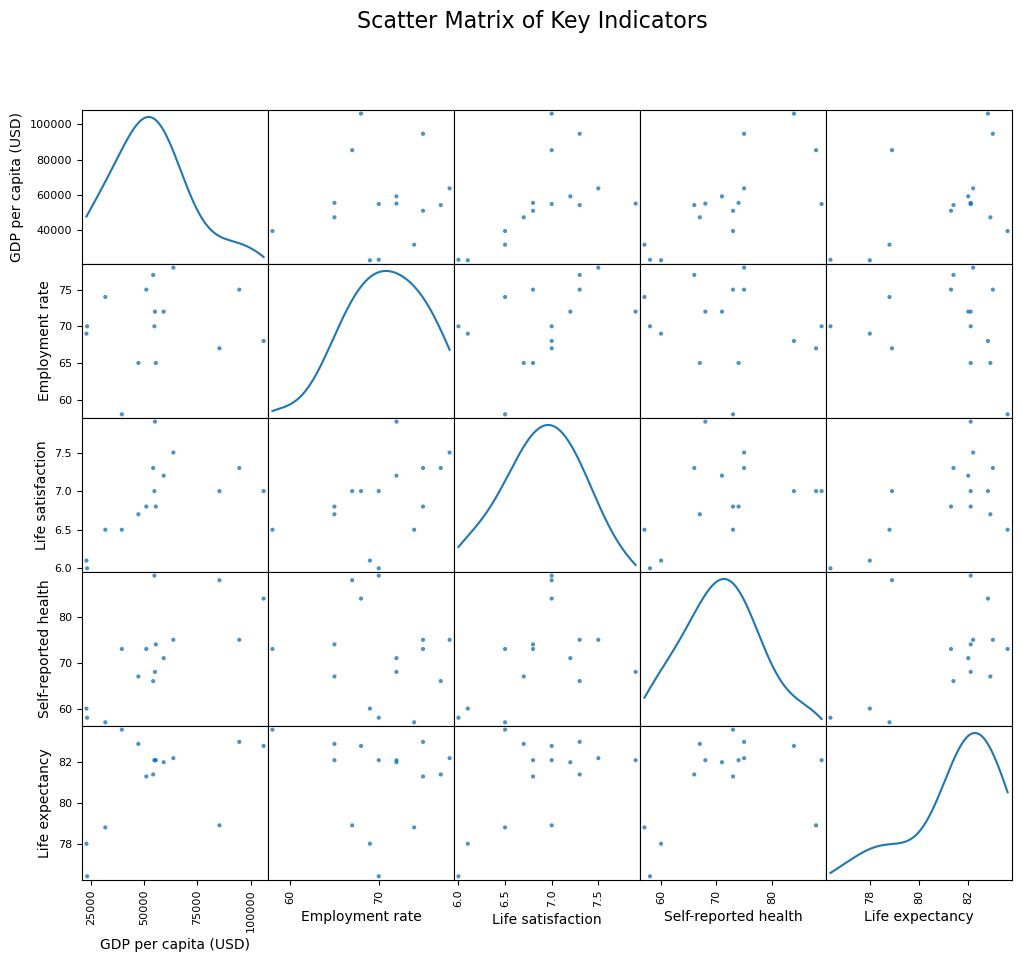

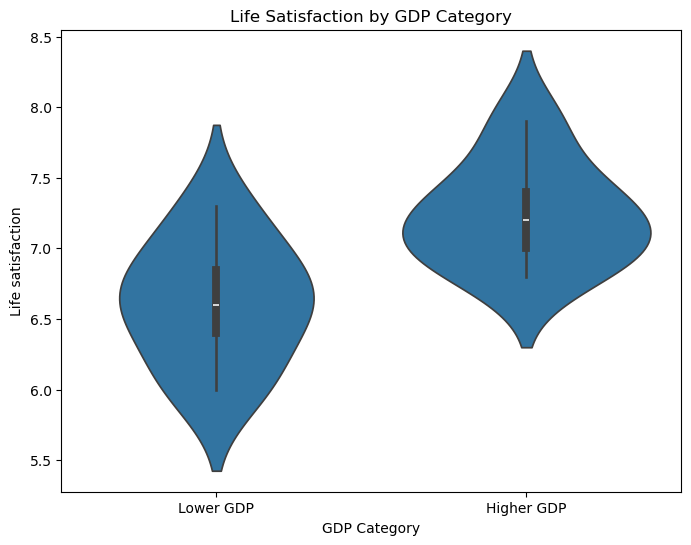

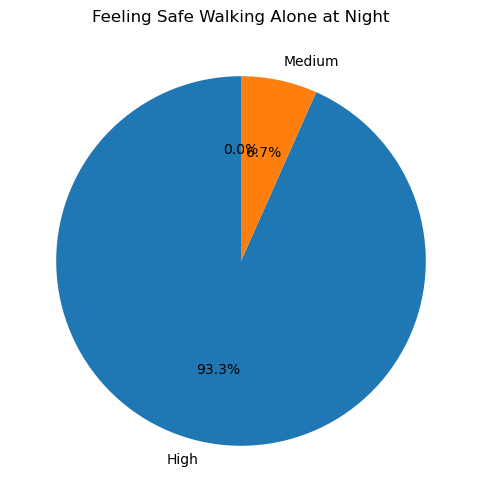

C:\Users\lorda\AppData\Local\Temp\ipykernel_16600\1966798421.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Life satisfaction', data=top_life, palette='Blues_d')


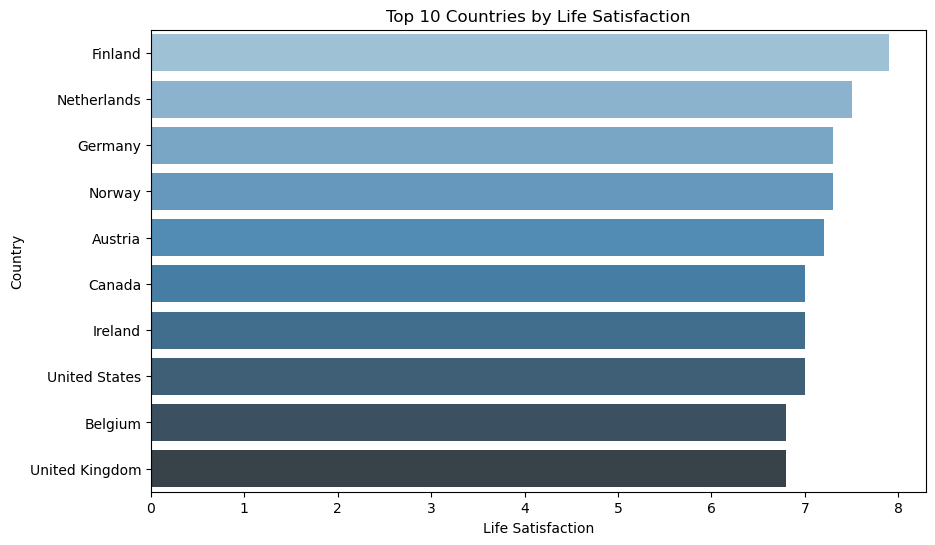

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

# Load the data
file_path = "tfv.xlsx"
df = pd.read_excel(file_path, sheet_name='RAW DATA')
df.columns = df.columns.str.strip()
print("Column names after stripping:")
print(df.columns.tolist())


# Initial Cleaning
print(f"Original rows: {len(df)}")
df_clean = df.dropna(subset=[
    "GDP per capita (USD)",
    "Employment rate",
    "Life satisfaction",
    "Self-reported health",
    "Life expectancy"
])
print(f"After cleaning: {len(df_clean)} rows")

# Convert to numeric where needed
numeric_cols = df_clean.columns.drop('Country')
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Remove outliers using Z-score
z_scores = stats.zscore(df_clean[numeric_cols], nan_policy='omit')
df_clean = df_clean[(np.abs(z_scores) < 3).all(axis=1)]
print(f"After outlier removal: {len(df_clean)} rows")

# NumPy Stats
print("\nNumPy Stats:")
print(f"Mean Life Satisfaction: {np.mean(df_clean['Life satisfaction']):.2f}")
print(f"Median Employment Rate: {np.median(df_clean['Employment rate']):.2f}%")
print(f"Std of GDP per Capita: {np.std(df_clean['GDP per capita (USD)']):,.0f}")

# Standardize Life Satisfaction
scaler = StandardScaler()
df_clean['Life satisfaction (scaled)'] = scaler.fit_transform(df_clean[['Life satisfaction']])

# Log transform GDP per capita
df_clean['Log GDP per capita'] = np.log1p(df_clean['GDP per capita (USD)'])

# Random sample
print("\nRandom Sample:")
print(df_clean[['Country', 'GDP per capita (USD)', 'Life satisfaction']].sample(5, random_state=42))

# Pearson Correlation
r, p = stats.pearsonr(df_clean['GDP per capita (USD)'], df_clean['Life satisfaction'])
print(f"\nGDP vs Life Satisfaction Correlation: r = {r:.3f}, p = {p:.4f}")

# Scatter Matrix
scatter_matrix(df_clean[[
    'GDP per capita (USD)', 'Employment rate', 'Life satisfaction',
    'Self-reported health', 'Life expectancy'
]], alpha=0.8, figsize=(12, 10), diagonal='kde')
plt.suptitle("Scatter Matrix of Key Indicators", fontsize=16)
plt.show()

# Violin Plot: Life Satisfaction by top vs bottom half GDP
df_clean['GDP Category'] = pd.qcut(df_clean['GDP per capita (USD)'], 2, labels=['Lower GDP', 'Higher GDP'])
plt.figure(figsize=(8, 6))
sns.violinplot(x='GDP Category', y='Life satisfaction', data=df_clean)
plt.title("Life Satisfaction by GDP Category")
plt.show()

# Pie Chart: Distribution of Countries by Feeling Safe
safe_bins = pd.cut(df_clean['Feeling safe walking alone at night'], bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(6, 6))
safe_bins.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Feeling Safe Walking Alone at Night")
plt.ylabel('')
plt.show()

# Barplot: Top 10 countries by Life Satisfaction
top_life = df_clean.sort_values(by='Life satisfaction', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='Country', x='Life satisfaction', data=top_life, palette='Blues_d')
plt.title("Top 10 Countries by Life Satisfaction")
plt.xlabel("Life Satisfaction")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()